In [1]:
#install nltk library 
!pip install nltk

    100% |████████████████████████████████| 1.4MB 423kB/s eta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import nltk
import pandas as pd
import numpy as np

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load Data 

In [11]:
#read the dataset 
df=pd.read_csv('sms_data',sep="\t",names=['labels','messages'])

In [12]:
#validate the shape of the dataset
df.shape

(5572, 2)

In [13]:
#view the dataset
df.head(5)

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## EDA

In [16]:
df.groupby('labels').describe()

messages
labels                                                          
ham    count                                                4825
       unique                                               4516
       top                                Sorry, I'll call later
       freq                                                   30
spam   count                                                 747
       unique                                                653
       top     Please call our customer service representativ...
       freq                                                    4

In [22]:
#add length column to the dataset
df['length']=list(map(len,df['messages']))

In [23]:
df.head(3)

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

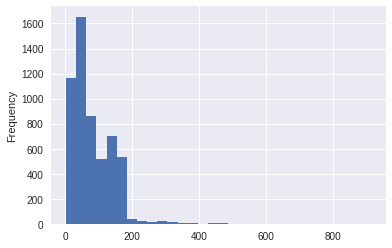

In [25]:
df['length'].plot(bins=30,kind='hist')

In [26]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [35]:
df[df['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb46669db38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb466952208>], dtype=object)

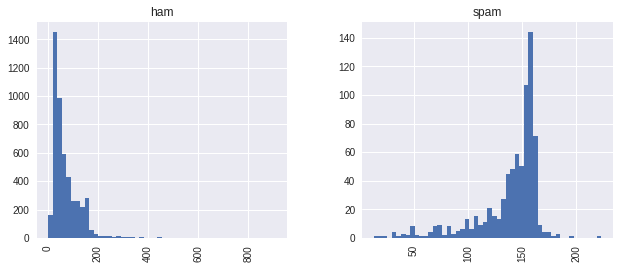

In [38]:
df.hist(column='length',by='labels',bins=50,figsize=(10,4))

In [39]:
# Validate of length is a strong predictor of ham /spam
#filter out ham values of length upto 200
df_subset=df[df['length'] < 201]

In [40]:
#validate the resulted df
df_subset.length.describe()

count    5459.000000
mean       75.788056
std        47.892763
min         2.000000
25%        35.000000
50%        60.000000
75%       118.000000
max       200.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4666e8400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fb466014908>], dtype=object)

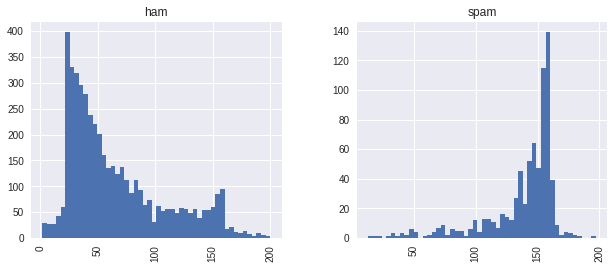

In [41]:
# repeat the above plot again
df_subset.hist(column='length',by='labels',bins=50,figsize=(10,4))

From the outset of it , looks like length is an important indicator of spam/ham since message length of above 100 seems to show trend of spam.

## Data Pre-Processing  ( Text to vectors ) 

In [45]:
import string
from nltk.corpus import stopwords

In [46]:
## create a single function to clean the text 
def clean_text (text):
    """
    This function cleans the text that is passed as an input
    
    1. Removes punctuations
    2. Removes stopwords
    
    """
    
    clean_msg=[char for char in text if char not in string.punctuation]
    
    clean_msg="".join(clean_msg)
    
    cleaner_msg=[word for word in clean_msg.split() if word.lower() not in stopwords.words('english')]
    
    return cleaner_msg
    

In [47]:
#try applying the text cleaning function to the messages
df['messages'].head(5).apply(clean_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

### Count Vectorizer

In [48]:
from sklearn.feature_extraction.text import CountVectorizer


In [49]:
bag_of_words_transformer=CountVectorizer(analyzer=clean_text)

In [50]:
bag_of_words_transformer.fit(df['messages'])

CountVectorizer(analyzer=<function clean_text at 0x7fb465f4d6a8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [54]:
#take one message and apply transformation on that to validate the count vectorizer
message_5=df['messages'][4]

In [61]:
print(message_5)

Nah I don't think he goes to usf, he lives around here though


In [56]:
bow_5=bag_of_words_transformer.transform([message_5])

In [58]:
print(bow_5)

  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1


In [59]:
print(bag_of_words_transformer.get_feature_names()[2948])

Nah


In [60]:
print(bag_of_words_transformer.get_feature_names()[4777])

around


In [62]:
## apply transforamtion on entire data messages
message_bow=bag_of_words_transformer.transform(df['messages'])

In [63]:
message_bow.shape

(5572, 11425)

## TF-idf 

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer

In [65]:
tfidf_transformer=TfidfTransformer().fit(message_bow)

In [66]:
messages_tfidf=tfidf_transformer.transform(message_bow)

In [67]:
print(messages_tfidf.shape)

(5572, 11425)


## Classification 

In [74]:
from sklearn.cross_validation import train_test_split

In [76]:
X_train,X_test,y_train,y_test=train_test_split(messages_tfidf,df['labels'],test_size=0.25,stratify=df['labels'])

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179, 11425)
(1393, 11425)
(4179,)
(1393,)


In [68]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
NB_model=MultinomialNB().fit(X_train,y_train)

In [80]:
NB_model.score(X_test,y_test)

0.9511844938980617

In [81]:
all_predictions=NB_model.predict(messages_tfidf)

## Evaluation

In [82]:
from sklearn.metrics import classification_report
print(classification_report(df['labels'],all_predictions))

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      4825
       spam       1.00      0.76      0.87       747

avg / total       0.97      0.97      0.97      5572

